In [1]:
# Import pandas library. Pandas takes data like a CSV file.
# It creates a Python object with rows and columns called data frame that looks similar to a table.

import pandas as pd
df = pd.read_csv('F:\\DataScience\\Datasets\\ion_energy_test.csv')

In [2]:
# Check the data in top 5 rows of the dataset.
df.head()

,Timestamp,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
0,1556701215000,0,66.72,1.0,25.229167,1.000000,0.0,1,1,0.0,0.0,0.0
1,1556702215000,0,66.72,1.0,25.528210,0.999774,0.0,1,1,0.0,0.0,0.0
2,1556703215000,0,66.72,1.0,25.859735,0.999679,0.0,1,1,0.0,0.0,0.0
3,1556704215000,0,66.72,1.0,26.204830,0.999606,0.0,1,1,0.0,0.0,0.0
4,1556705215000,0,66.72,1.0,26.553448,0.999542,0.0,1,1,0.0,0.0,0.0


In [3]:
# to check the number of rows and columns in the dataset.
df.shape

(31104, 12)

In [4]:
# to check if there are any missing values in any of the fields.
df.count()

Timestamp                             31104
Current                               31104
Total voltage                         31104
SOC                                   31104
Temperature                           31104
SOH                                   31104
Equivalent cycle                      31104
Application status                    31104
Grid status                           31104
Grid power                            31104
Grid energy consumption               31104
Grid cumulative energy consumption    31104
dtype: int64

In [5]:
# Import matplotlib library. It is a library for plotting graphs, charts etc. It makes visualizing data easy.
# In iPython, the %matplotlib inline will make your plot outputs appear directly below the code cell & be stored within the notebook. 

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

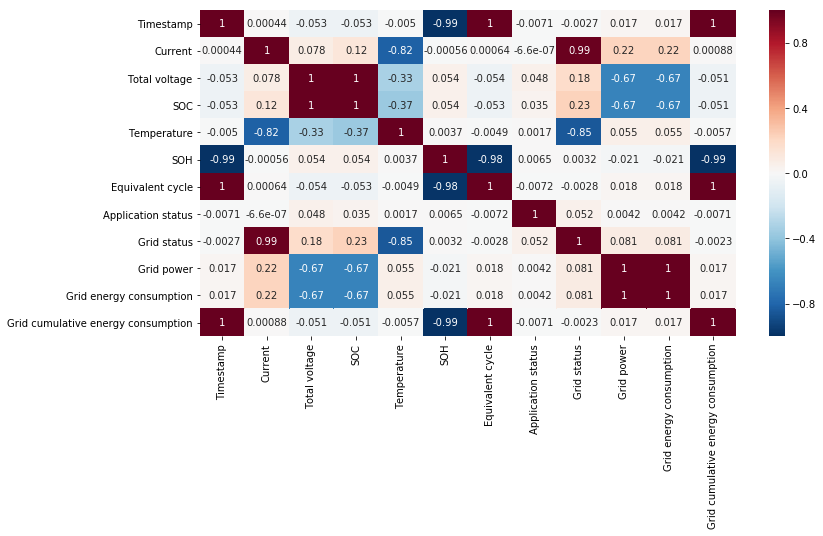

In [6]:
# Let's do a graphical representation of correlation between variables as a whole to get a general idea of our data.
# The heatmap gives us color coding to differentiate between several correlation values.

correlation = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot = True, vmin = -1, linewidths = 0, cmap = "RdBu_r")

In [7]:
# Here we are dropping column 'Timestamp' to make our heatmap look a bit better.

df = df.drop(columns = "Timestamp")

In [8]:
# Let us first look at the summary statistics of our dataset.

df.describe()

,Current,Total voltage,SOC,Temperature,SOH,Equivalent cycle,Application status,Grid status,Grid power,Grid energy consumption,Grid cumulative energy consumption
count,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,31104.000000,3.110400e+04
mean,-0.003858,64.272196,0.828945,27.915732,0.948226,52.563840,0.999968,0.988137,221.494578,61.526272,9.442240e+05
std,33.170852,1.918436,0.134033,13.308070,0.019635,31.301743,0.005670,0.108273,299.129090,83.091414,5.556151e+05
min,-300.000000,48.160346,-0.155714,20.263275,0.919398,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00
25%,0.000000,63.700213,0.781742,22.272948,0.932068,24.438458,1.000000,1.000000,0.000000,0.000000,4.466059e+05
50%,0.000000,65.299735,0.901914,26.060848,0.945187,52.499507,1.000000,1.000000,0.000000,0.000000,9.466569e+05
75%,10.000000,65.344541,0.905029,29.523420,0.963154,77.241660,1.000000,1.000000,617.410545,171.502929,1.386711e+06
max,10.000000,66.720000,1.000000,136.118156,1.000000,107.847718,1.000000,1.000000,654.014349,181.670653,1.913713e+06


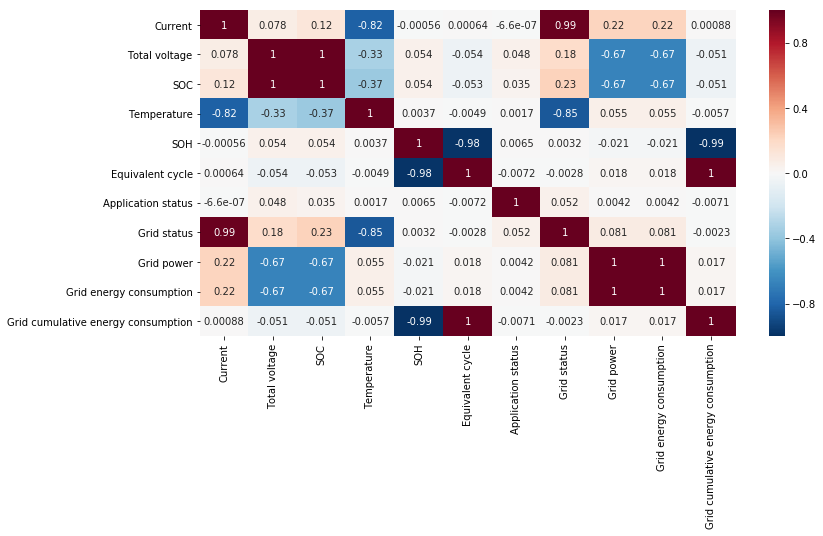

In [9]:
# A heatmap of correlations after excluding Timestamp column.

correlation = df.corr()
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot = True, vmin = -1, linewidths = 0, cmap = "RdBu_r")

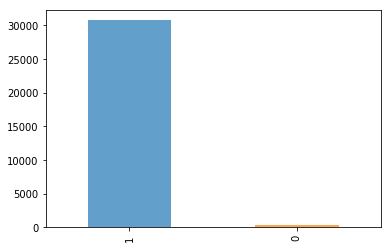

In [10]:
# Now that we have a rough idea about correlations, we can proceed with variable relationships that we want to check.
# A simple distribution of 'Grid status' is shown below.

alpha_color = 0.7
df['Grid status'].value_counts().plot(kind = 'bar', alpha = alpha_color)

###  1. Correlation between Grid status and SOC

In [11]:
# Here we are trying to check correlation between categorical and continuos variables
# We can use point biserial correlation coefficient

from scipy.stats import pointbiserialr

# SciPy is used for scientific computing and technical computing.
# SciPy contains modules for optimization, linear algebra, integration, interpolation etc.

grid = df['Grid status']
soc = df['SOC']

pbc = pointbiserialr(grid, soc)
print(pbc)

PointbiserialrResult(correlation=0.22794666128547855, pvalue=0.0)


#### We see that the correlation between Grid status and SOC is around 0.23.
#### That means the two variables exhibit weak correlation.

In [12]:
# NumPy is a Python package which stands for ‘Numerical Python’.
# NumPy is used for scientific computing with Python.
# Numpy array is a powerful N-dimensional array object which is in the form of rows and columns.

import numpy as np
np.corrcoef(grid,soc)

array([[1.        , 0.22794666],
       [0.22794666, 1.        ]])

#### The upward sloping line in the graph below helps us understand that the correlation between Grid status and SOC is positive.

C:\Users\Amey\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


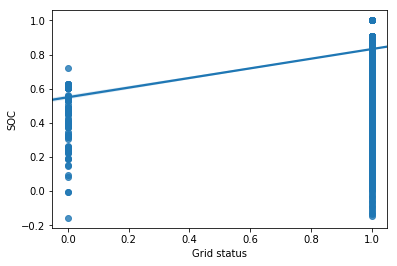

In [13]:
sns.regplot(x='Grid status', y='SOC', data=df)

###  2. Correlation between Equivalent cycle and SOH

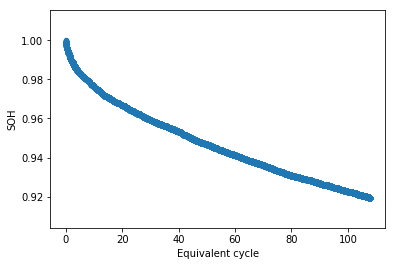

In [14]:
# Now let us check the correlation between Equivalent cycles and SOH.

df.plot.scatter('Equivalent cycle', 'SOH')

#### The scatter plot above clearly indicates that there is negative correlation among the two variables.

In [15]:
df['Equivalent cycle'].corr(df['SOH'])

-0.9842624478536381

In [16]:
from scipy.stats import pearsonr
pear = pearsonr(df['Equivalent cycle'], df['SOH'])
print(pear)

(-0.9842624478536391, 0.0)


#### If we check the value of Pearson correlation coefficient, it is very high at -0.98
#### Thus we can conclude that there is strong negative correlation between Equivalent cycles and SOH

###  3. Correlation between Temprature and SOC

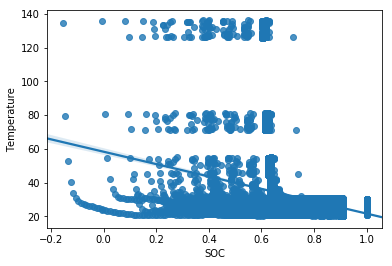

In [17]:
regr = sns.regplot(x = 'SOC', y = 'Temperature', data = df)

In [18]:
df['Temperature'].corr(df['SOC'])

-0.369040353266107

#### We see from the graph that the line is sloping downwards. This indicates negative correlation.
#### To confirm that, we have calculated the correlation coefficient between 'Temprature' and 'SOC'.
#### The result is a negative value which is equal to -0.37. Thus we can conclude that the two variables have moderate correlation.

In [19]:
temp = df['Temperature']
pbcr = pointbiserialr(soc, temp)
print(pbcr)

PointbiserialrResult(correlation=-0.369040353266106, pvalue=0.0)


### To Summarize:
    1. Grid status and SOC positively affect each other.
    2. As Equivalent cycle increases, SOH decreases and vice versa as they are negatively correlated.
    3. We observe that with increase in Temprature there is a gradual decrease in SOC.
       Higher the SOC, lower the temprature.